In [3]:
%config InlineBackend.figure_format = 'retina'   ##QUALITY FIGURES!!

# Spectral Clustering Examples


**Emilio Parrado Hernández**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


In [2]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

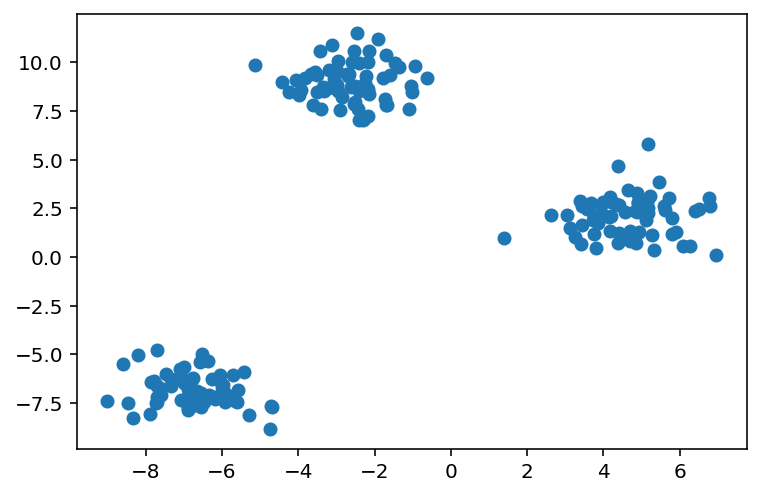

In [3]:
n_samples = 200
random_state = 42
X = datasets.make_blobs(n_samples=n_samples, random_state=42)[0]
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

In [4]:

K=3

kmeans = KMeans(n_clusters=K, random_state=42) # Create model, non-give arguments set to their default value
kmeans.fit(X) # Learn centroids
y_kmeans = kmeans.predict(X) # get cluster memberships of training data
centers = kmeans.cluster_centers_ # get centroids

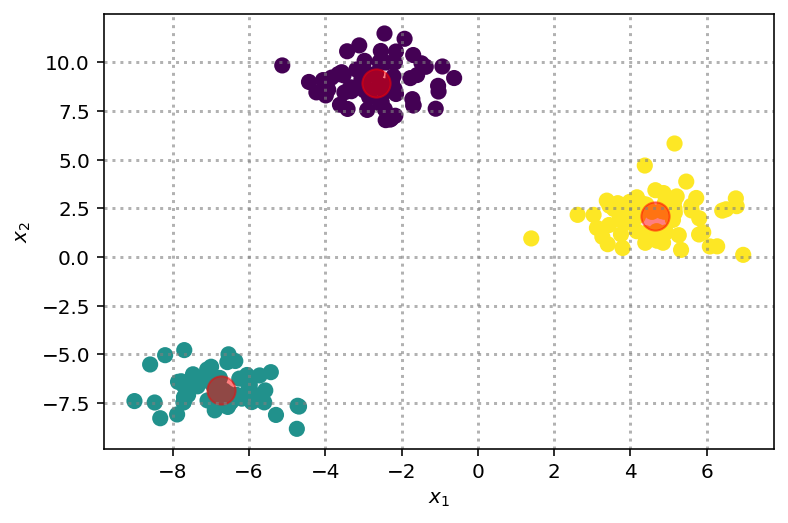

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Less typical example

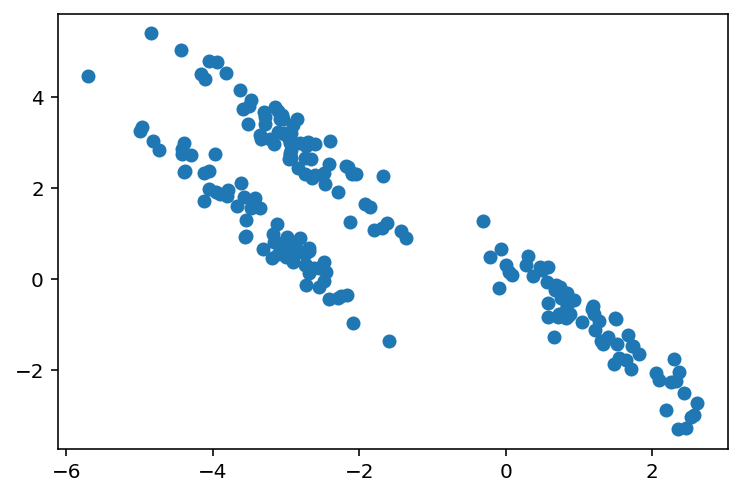

In [6]:
random_state = 170
Xs, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(Xs, transformation)
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

In [7]:
kmeans = KMeans(n_clusters=K, random_state=42) # Create model, non-give arguments set to their default value
kmeans.fit(X) # Learn centroids
y_kmeans = kmeans.predict(X) # get cluster memberships of training data
centers = kmeans.cluster_centers_ # get centroids

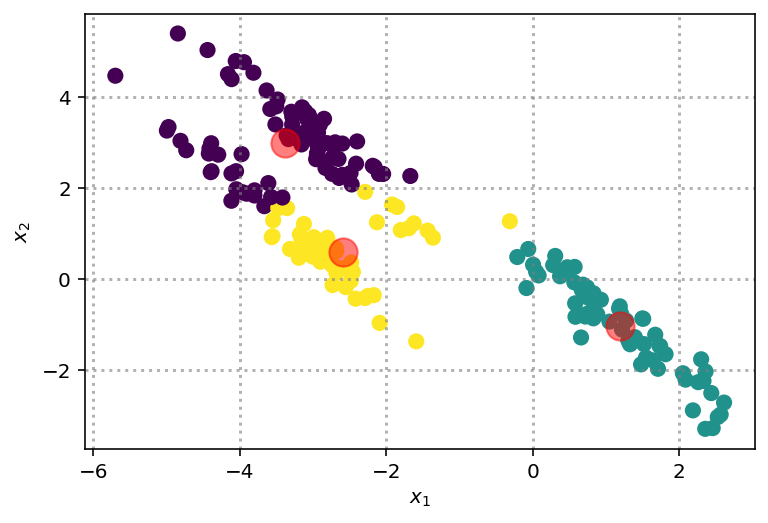

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Other less typical example

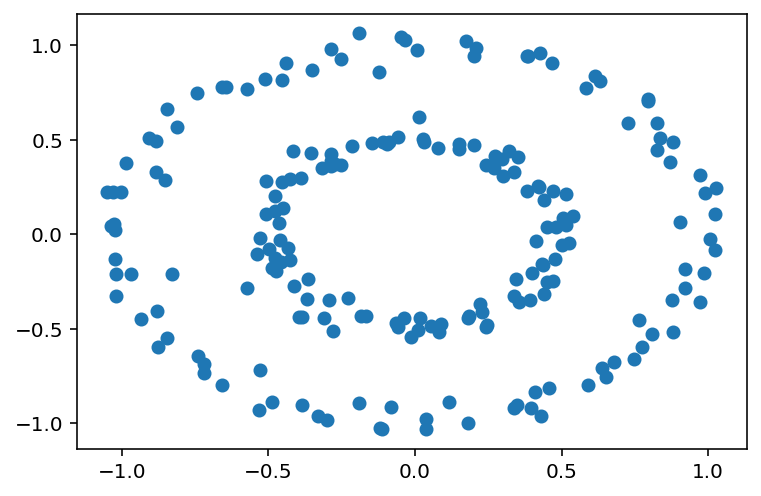

In [9]:
X = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)[0]
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

In [10]:
K=2
kmeans = KMeans(n_clusters=K, random_state=42) # Create model, non-give arguments set to their default value
kmeans.fit(X) # Learn centroids
y_kmeans = kmeans.predict(X) # get cluster memberships of training data
centers = kmeans.cluster_centers_ # get centroids

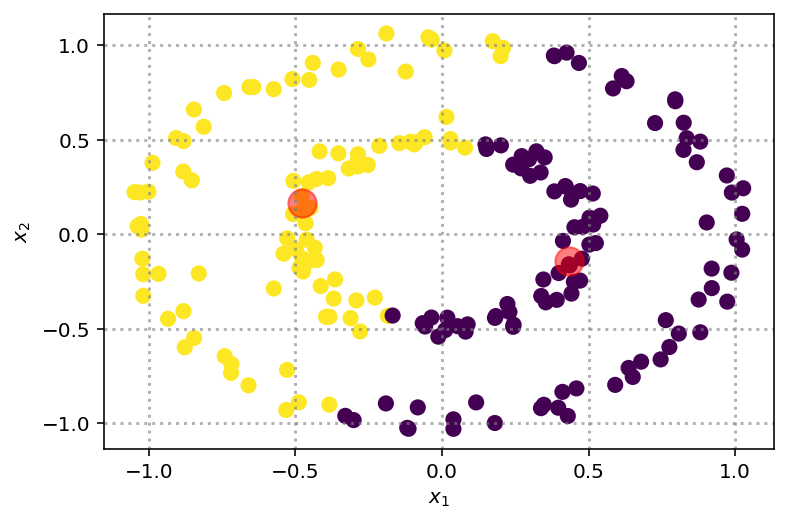

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## Normalized Cut Example

### Data generation

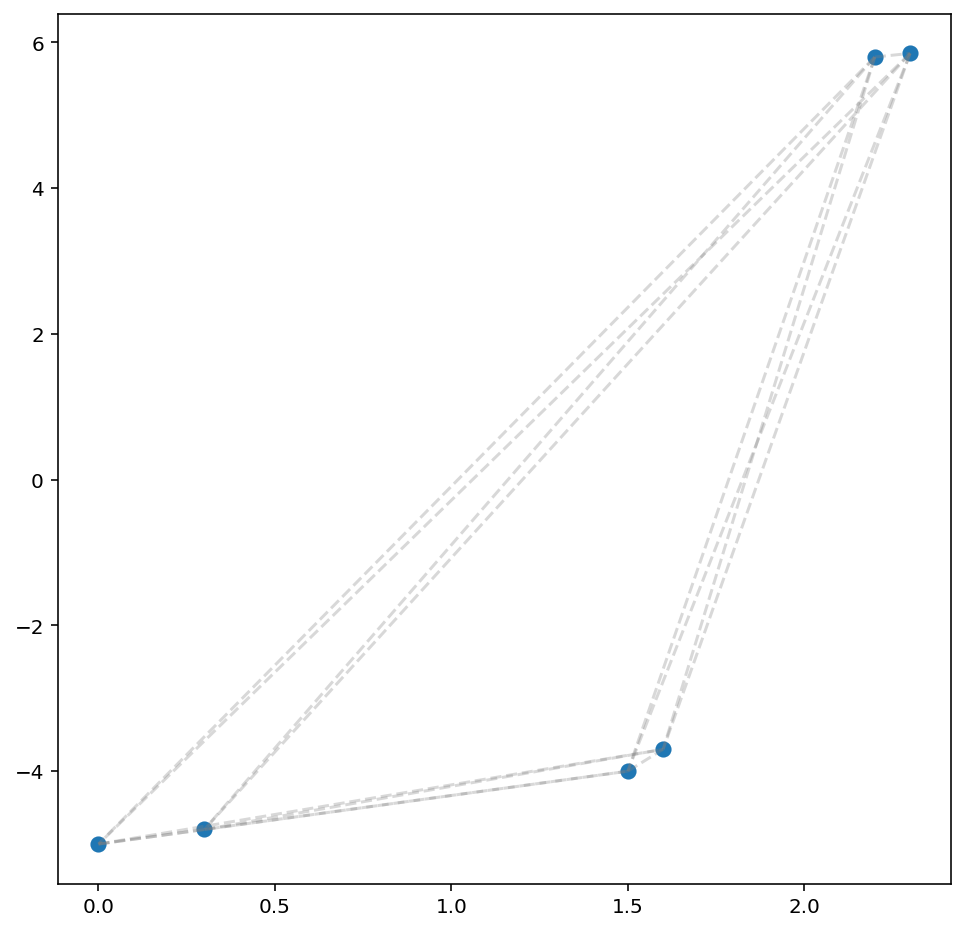

In [12]:
X= np.array([[2.2, 5.8],
             [2.3, 5.85],
             [0,-5],
             [0.3,-4.8],
             [1.5,-4],
             [1.6,-3.7]])
plt.figure(figsize=(8,8))
_=plt.scatter(X[:,0], X[:,1],s=50)
for ii in range(X.shape[0]-1):
    for jj in range(ii+1, X.shape[0]):
        plt.plot([X[ii,0], X[jj,0]], 
                [X[ii,1], X[jj,1]],
                ls='--',
                 color='gray',
                 alpha=0.3)


RBF kernel to compute affinity Matrix

In [13]:
A = rbf_kernel(X,gamma = 0.3)-np.eye(X.shape[0])
print(np.round(A,3))

[[0.    0.996 0.    0.    0.    0.   ]
 [0.996 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.962 0.377 0.279]
 [0.    0.    0.962 0.    0.536 0.419]
 [0.    0.    0.377 0.536 0.    0.97 ]
 [0.    0.    0.279 0.419 0.97  0.   ]]


Weight of the edges that connect each node

In [14]:
D = np.sum(A,1)
print(np.round(D,3))

[0.996 0.996 1.618 1.916 1.883 1.669]


There are 31 ways of partitioning 6 observations in 2 groups.

The next code computes the normalized cut that gives each of these 31 splits

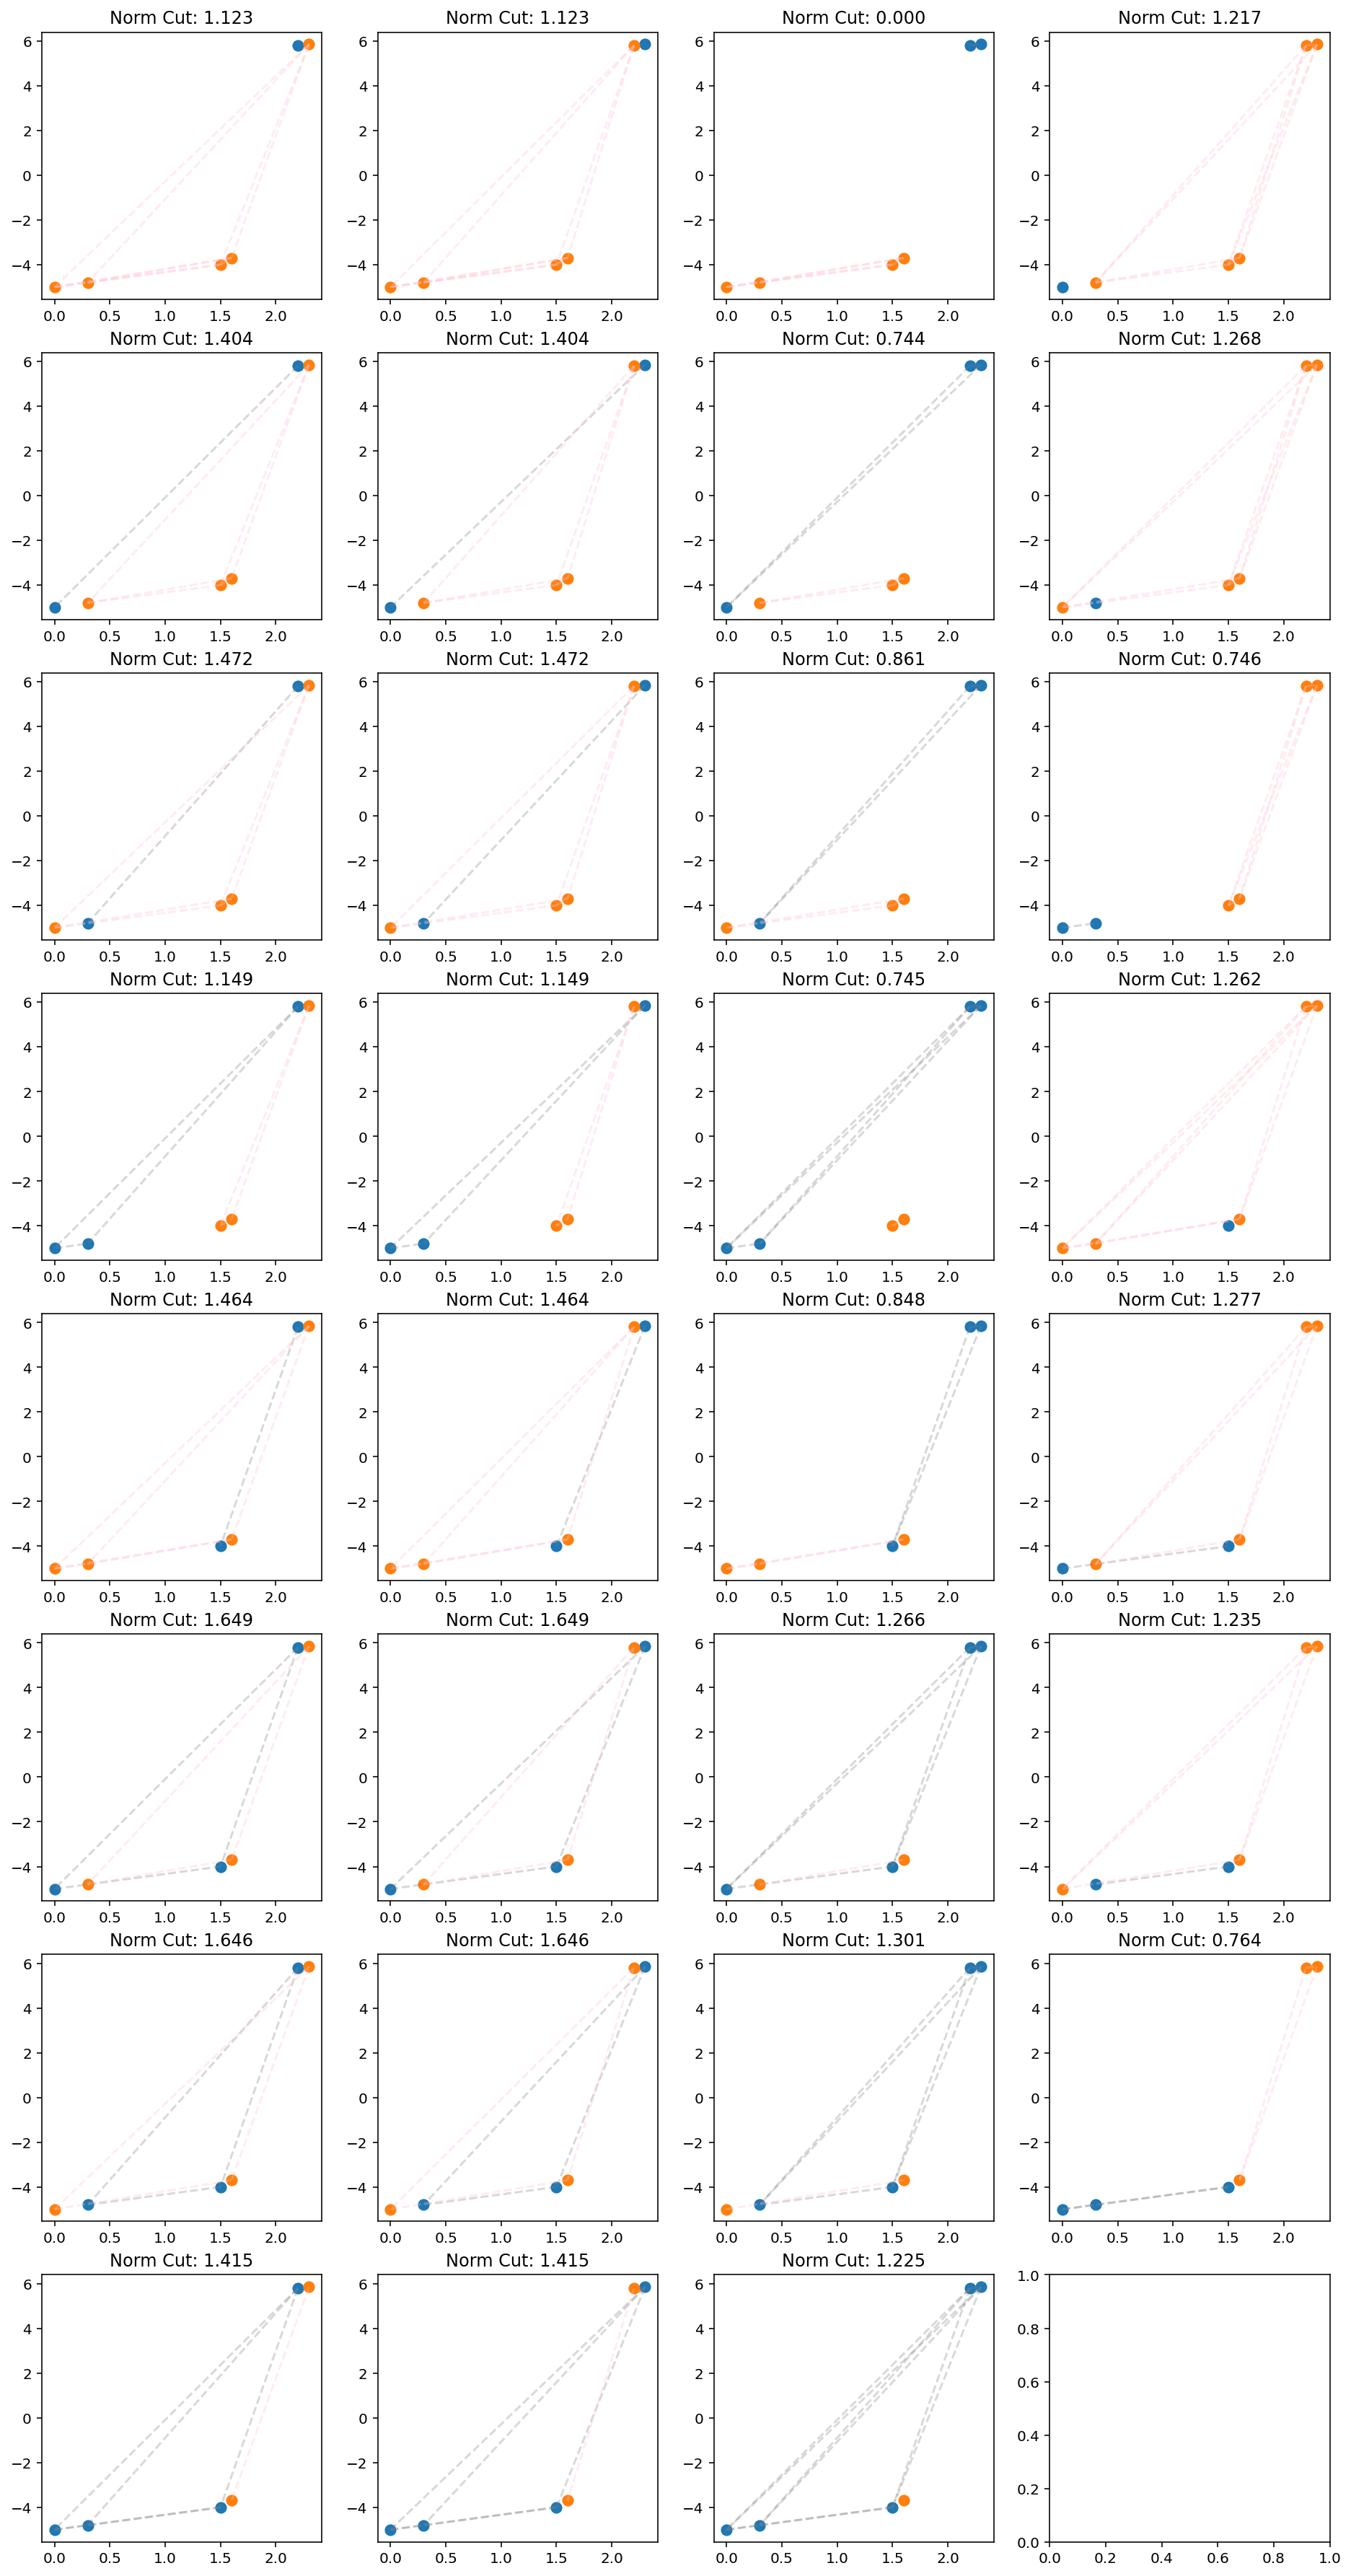

In [15]:
nrow=8
ncol=4
ff,aa = plt.subplots(nrow,ncol,figsize=(16,32))
row=0
col=0
for num in range(1,32):
    group = [bool(num & (1<<n)) for n in range(6)]
    id_group = np.where(group)[0]
    not_group = [not(cc) for cc in group]
    id_not_group = np.where(not_group)[0]
    aa[row][col].scatter(X[group,0], X[group,1],s=50)
    if len(id_group) > 1:
        for ii in range(len(id_group)-1):
            for jj in range(ii+1, len(id_group)):
                aa[row][col].plot([X[id_group[ii],0], X[id_group[jj],0]], 
                        [X[id_group[ii],1], X[id_group[jj],1]],
                        ls='--',
                         color='gray',
                         alpha=0.3)
    aa[row][col].scatter(X[not_group,0], X[not_group,1], s=50)
    if len(id_not_group) > 1:
        for ii in range(len(id_not_group)-1):
            for jj in range(ii+1, len(id_not_group)):
                aa[row][col].plot([X[id_not_group[ii],0], X[id_not_group[jj],0]], 
                        [X[id_not_group[ii],1], X[id_not_group[jj],1]],
                        ls='--',
                         color='pink',
                         alpha=0.3)
    W_group = np.sum(np.array([np.sum(A[ii,not_group]) for ii,cc in enumerate(group) if cc]))/ np.sum(D[group])
    W_not_group = np.sum(np.array([np.sum(A[ii,group]) for ii,cc in enumerate(not_group) if cc]))/ np.sum(D[not_group])
    aa[row][col].set_title('Norm Cut: {0:.3f}'.format(W_group + W_not_group))
    col += 1
    if col==ncol:
        col=0
        row +=1
        
        #The best partician is the one with the smallest score

### Ejemplo 1:


In [ ]:
from sklearn.cluster import SpectralClustering

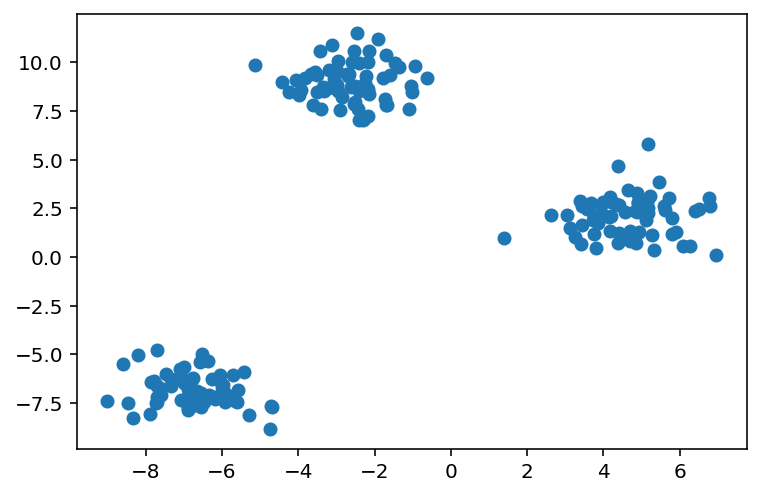

In [ ]:
n_samples = 200
random_state = 42
X = datasets.make_blobs(n_samples=n_samples, random_state=42)[0]
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

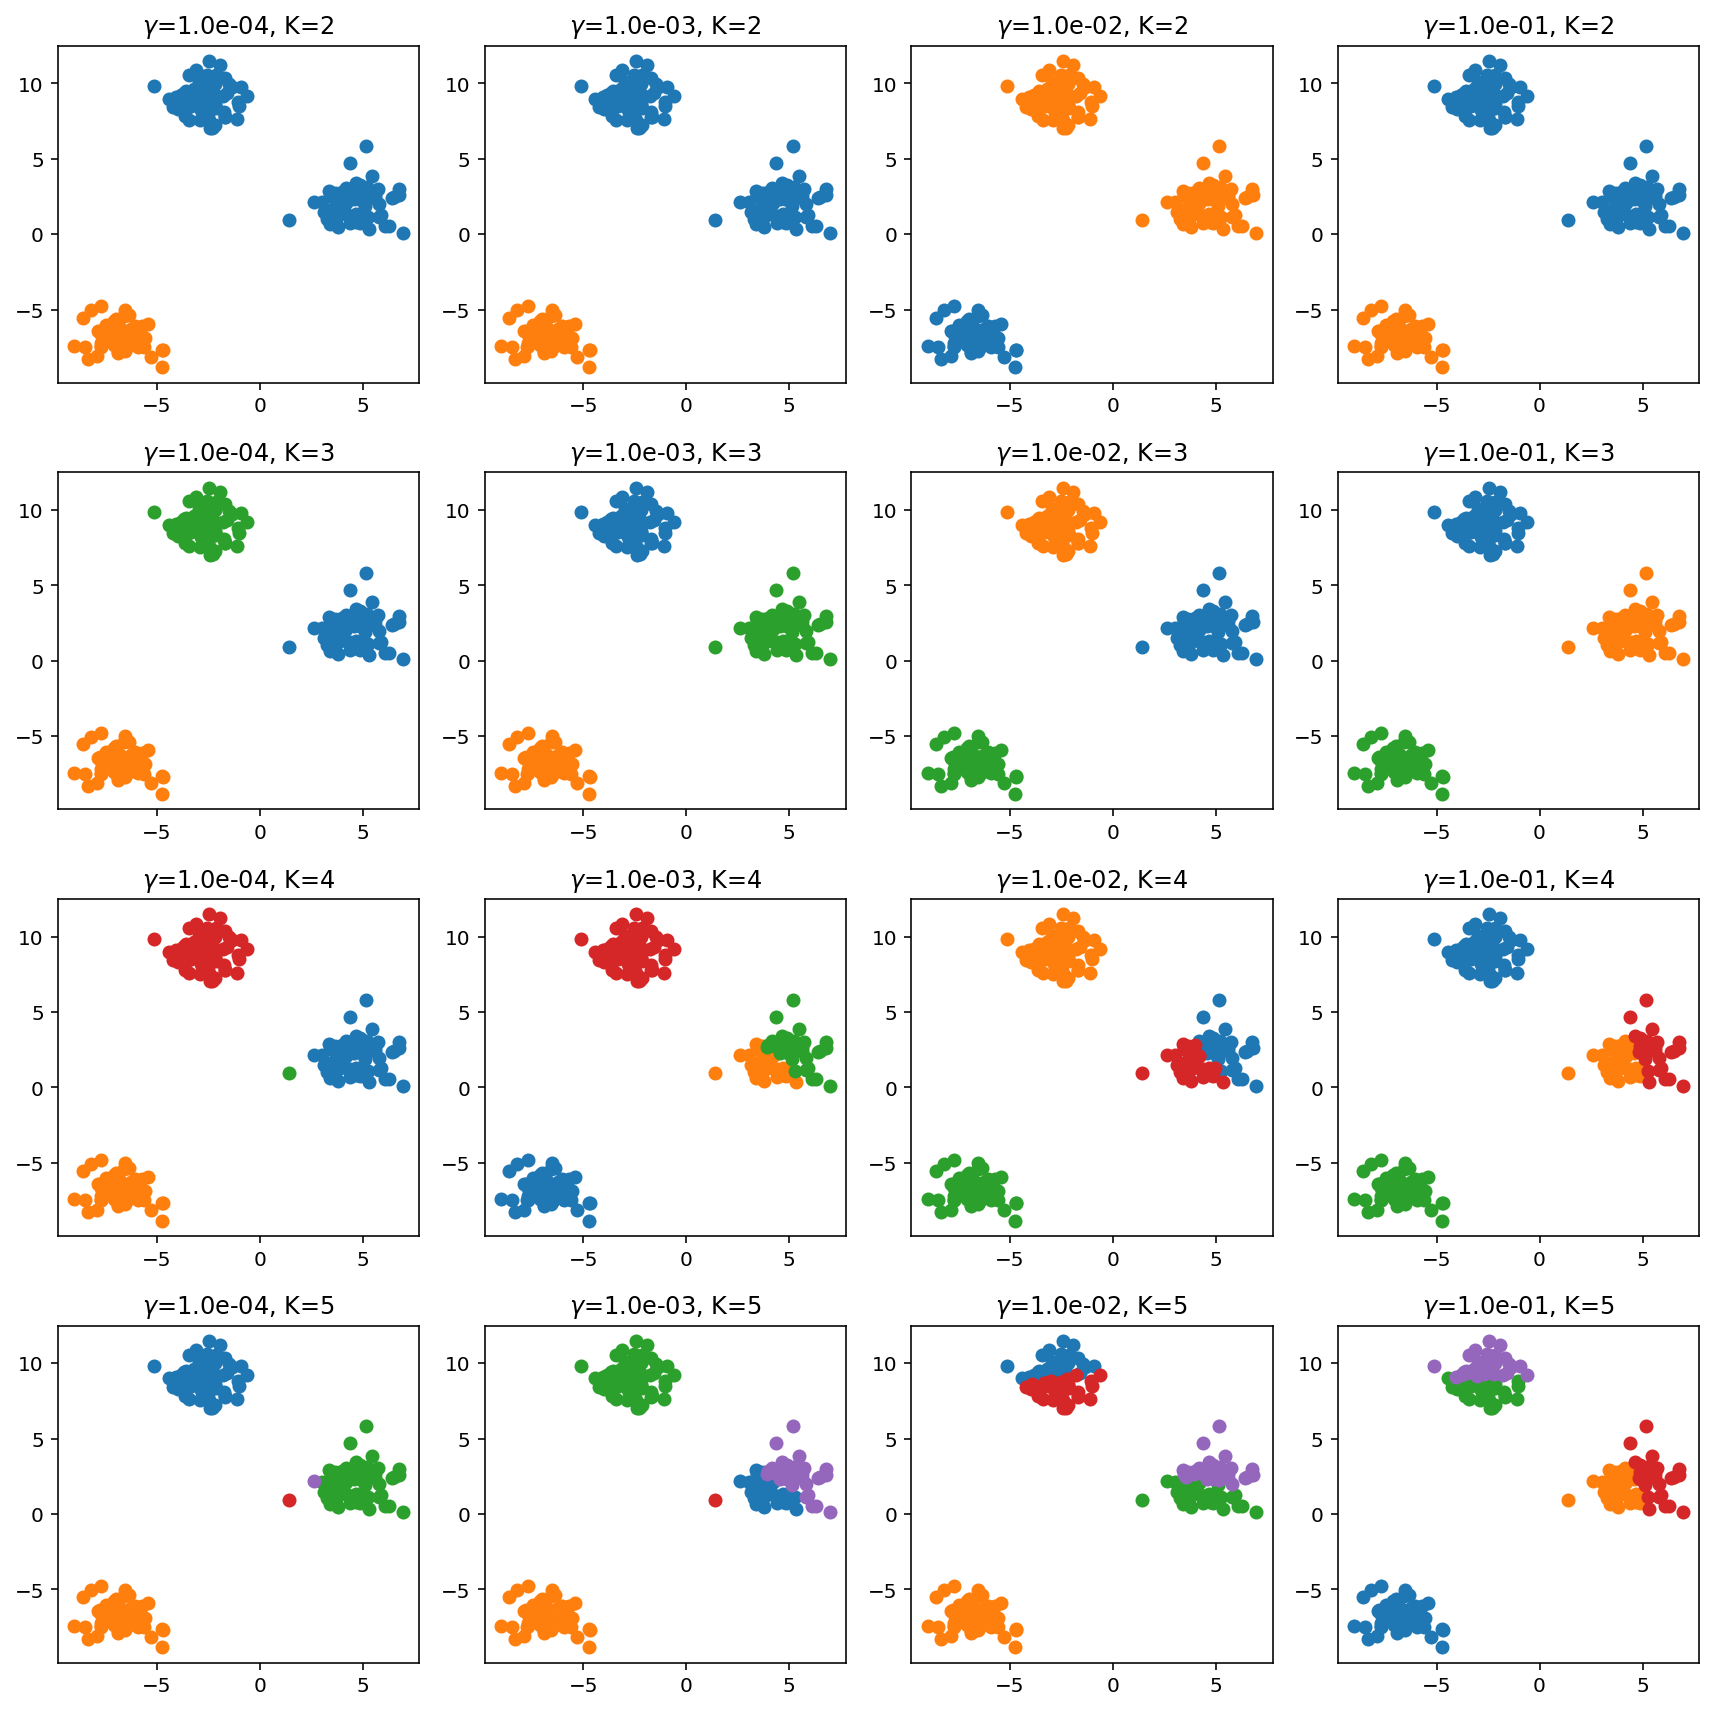

In [ ]:
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [1e-4,1e-3,1e-2,1e-1, 1]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(X)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))
    
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))
      
        aa[rr][cc].set_title('$\\gamma$={0:.1e}, K={1:d}'.format(gamma,K))
    
ff.tight_layout()    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

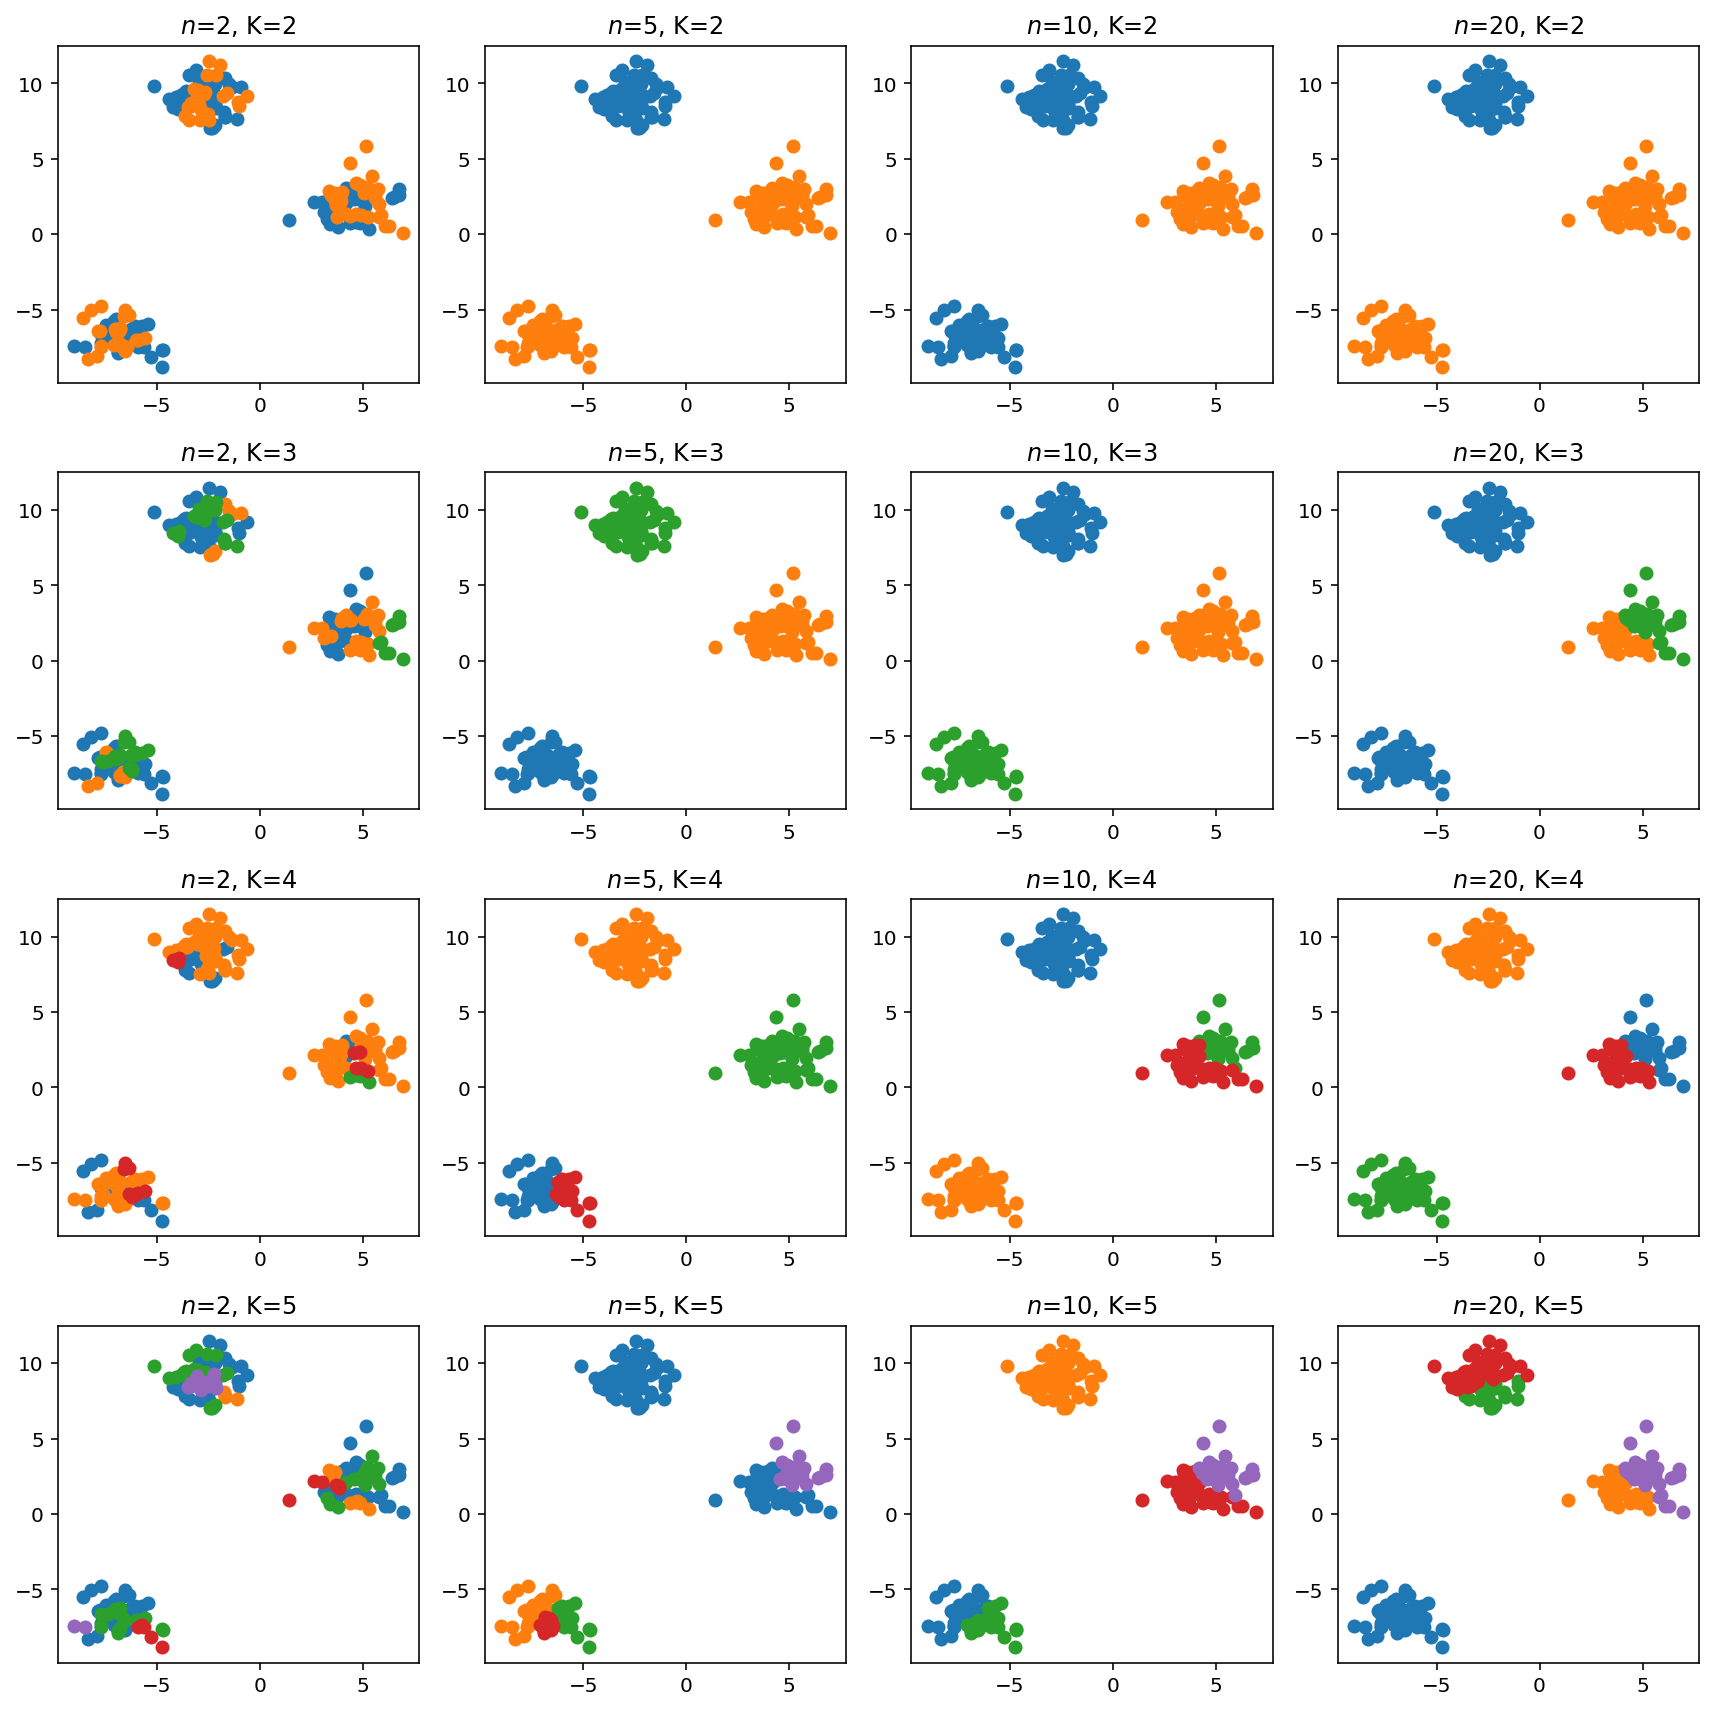

In [ ]:
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_neighbors = [2,5,10,20]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        n_neighbors = v_neighbors[cc]
        clustering = SpectralClustering(n_clusters=K,
                                        affinity='nearest_neighbors',
                                        n_neighbors=n_neighbors).fit(X)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))
    
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))
      
        aa[rr][cc].set_title('$n$={0:d}, K={1:d}'.format(n_neighbors,K))
    
ff.tight_layout()  

### Ejemplo 2:

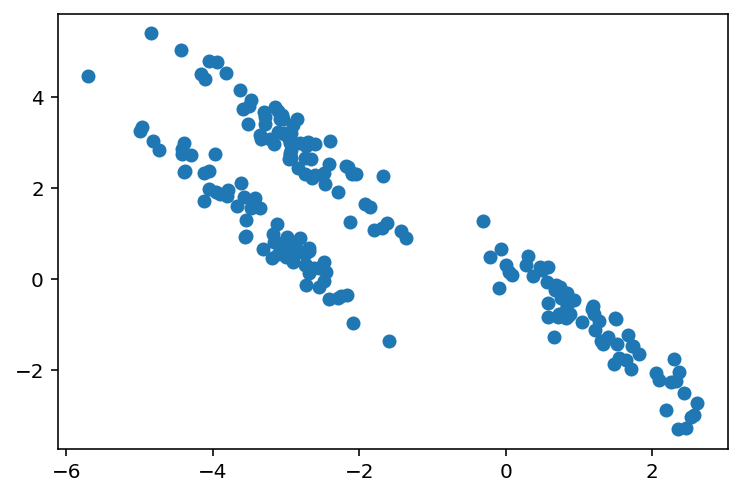

In [ ]:
random_state = 170
Xs, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(Xs, transformation)
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

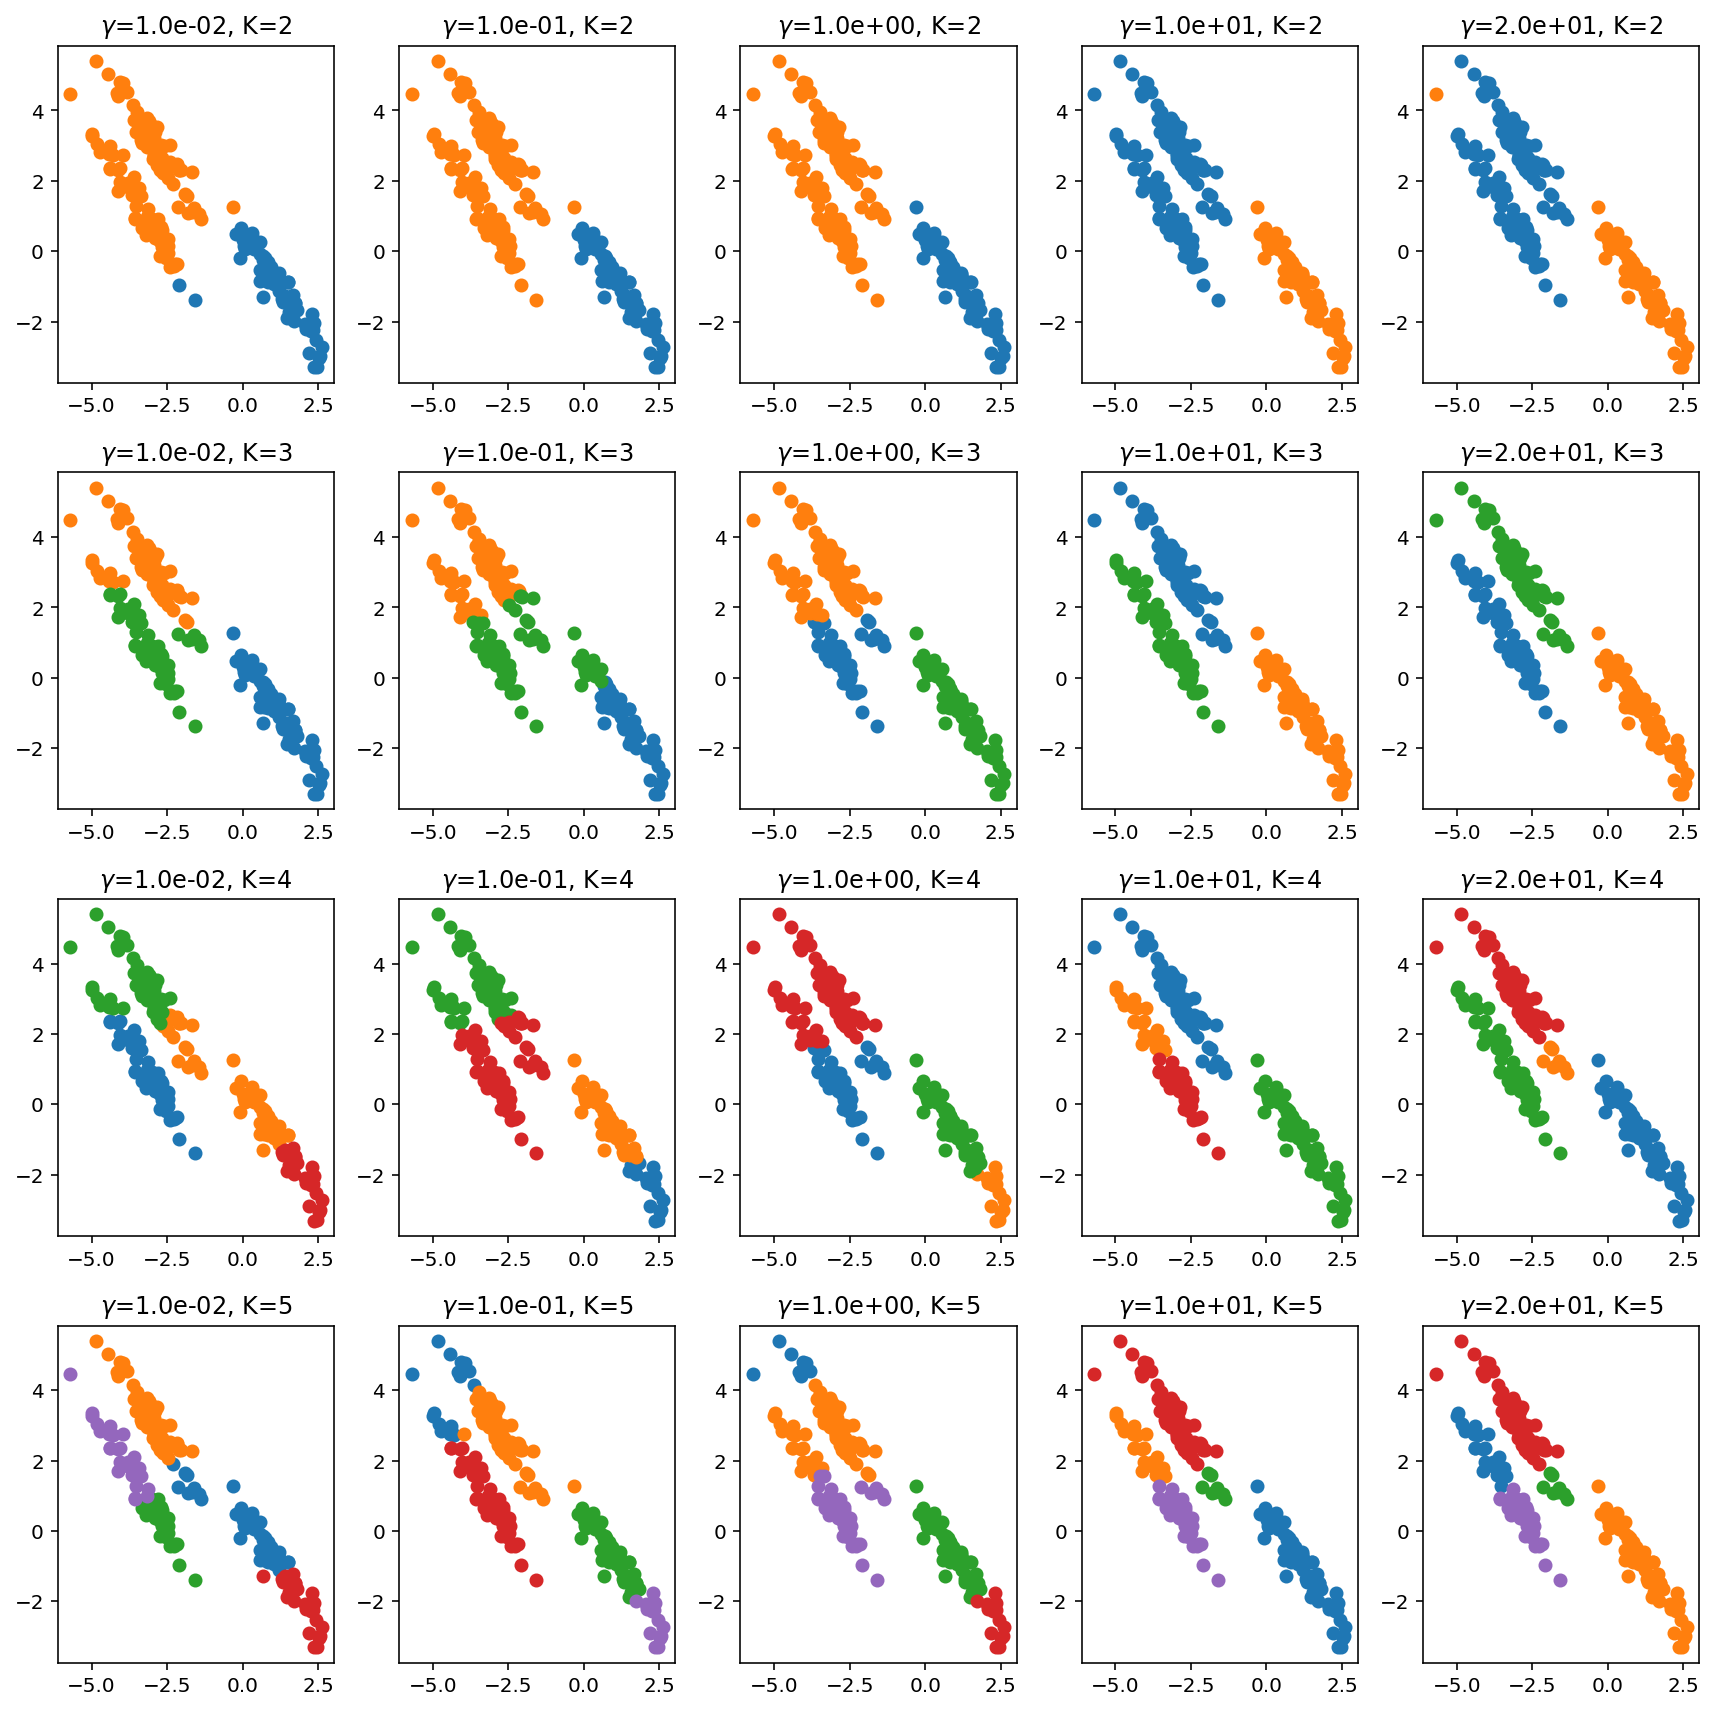

In [ ]:
v_K = [2, 3, 4, 5]
v_gamma = [1e-2,1e-1, 1, 10, 20]

nrows=len(v_K)
ncols=len(v_gamma)
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(X)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))

        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title('$\\gamma$={0:.1e}, K={1:d}'.format(gamma,K))
    
ff.tight_layout()  

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

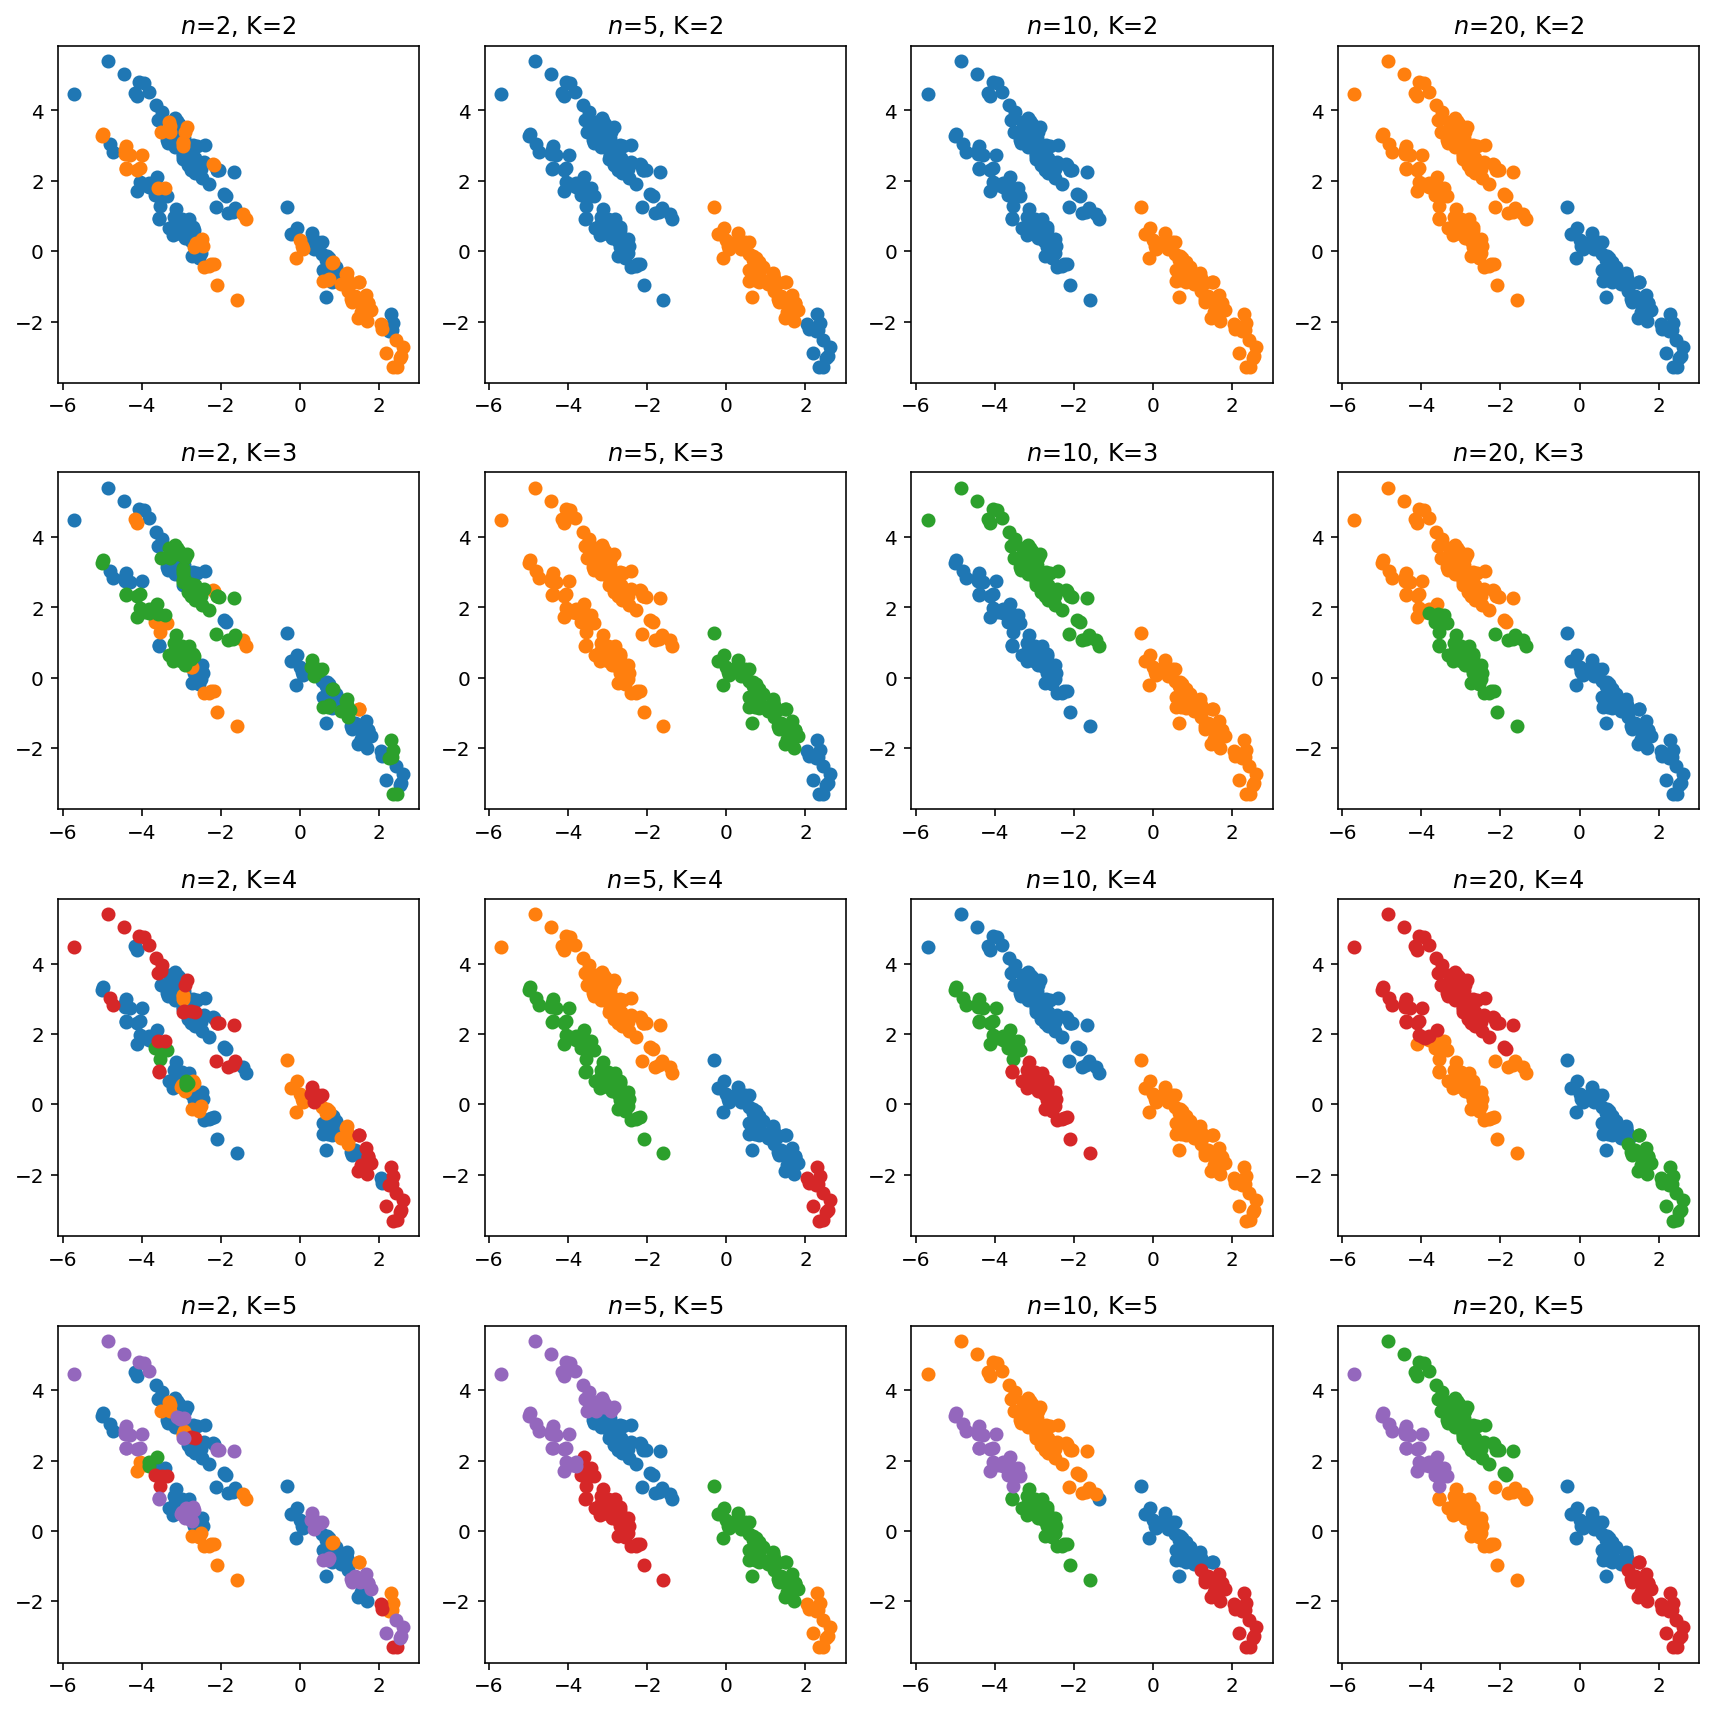

In [ ]:
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_neighbors = [2,5,10,20]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        n_neighbors = v_neighbors[cc]
        clustering = SpectralClustering(n_clusters=K,
                                        affinity='nearest_neighbors',
                                        n_neighbors=n_neighbors).fit(X)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))
    
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))
      
        aa[rr][cc].set_title('$n$={0:d}, K={1:d}'.format(n_neighbors,K))
    
ff.tight_layout()  

### Ejemplo 3:

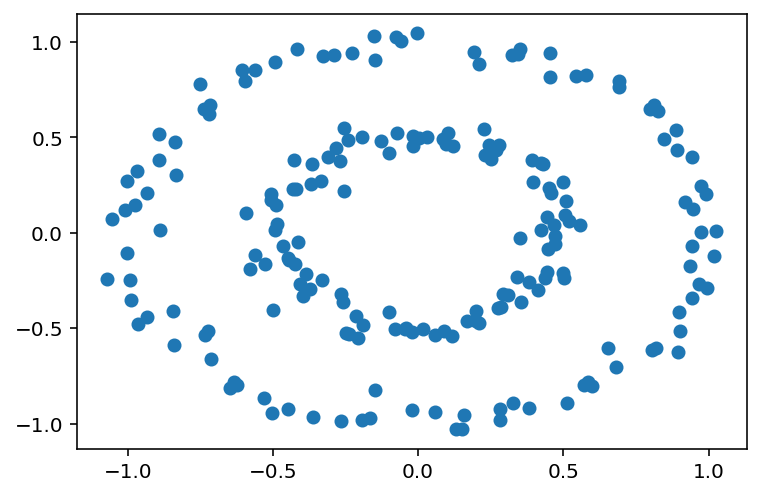

In [ ]:
X = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)[0]
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

NameError: name 'SpectralClustering' is not defined

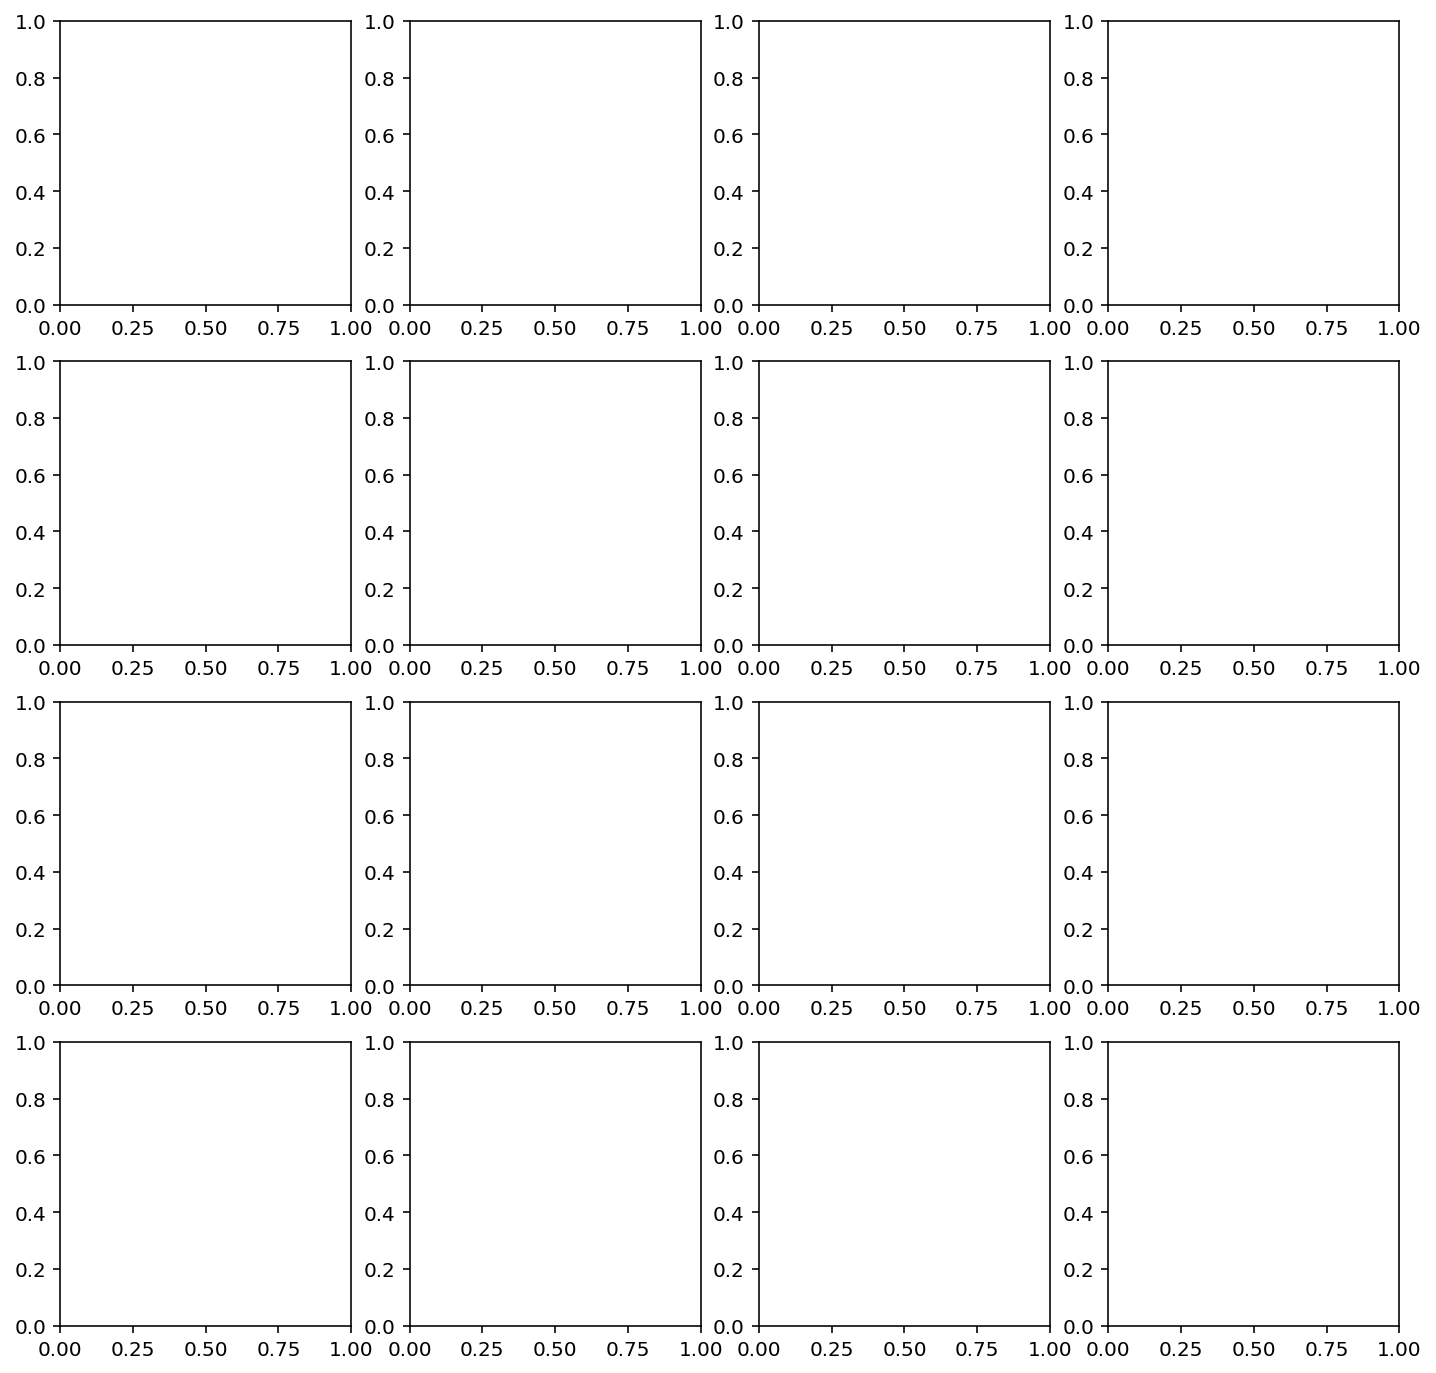

In [4]:
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_gamma = [.01, .1, 1, 10, 50]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        gamma = v_gamma[cc]
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(X)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))

        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))

        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))
    
ff.tight_layout()   

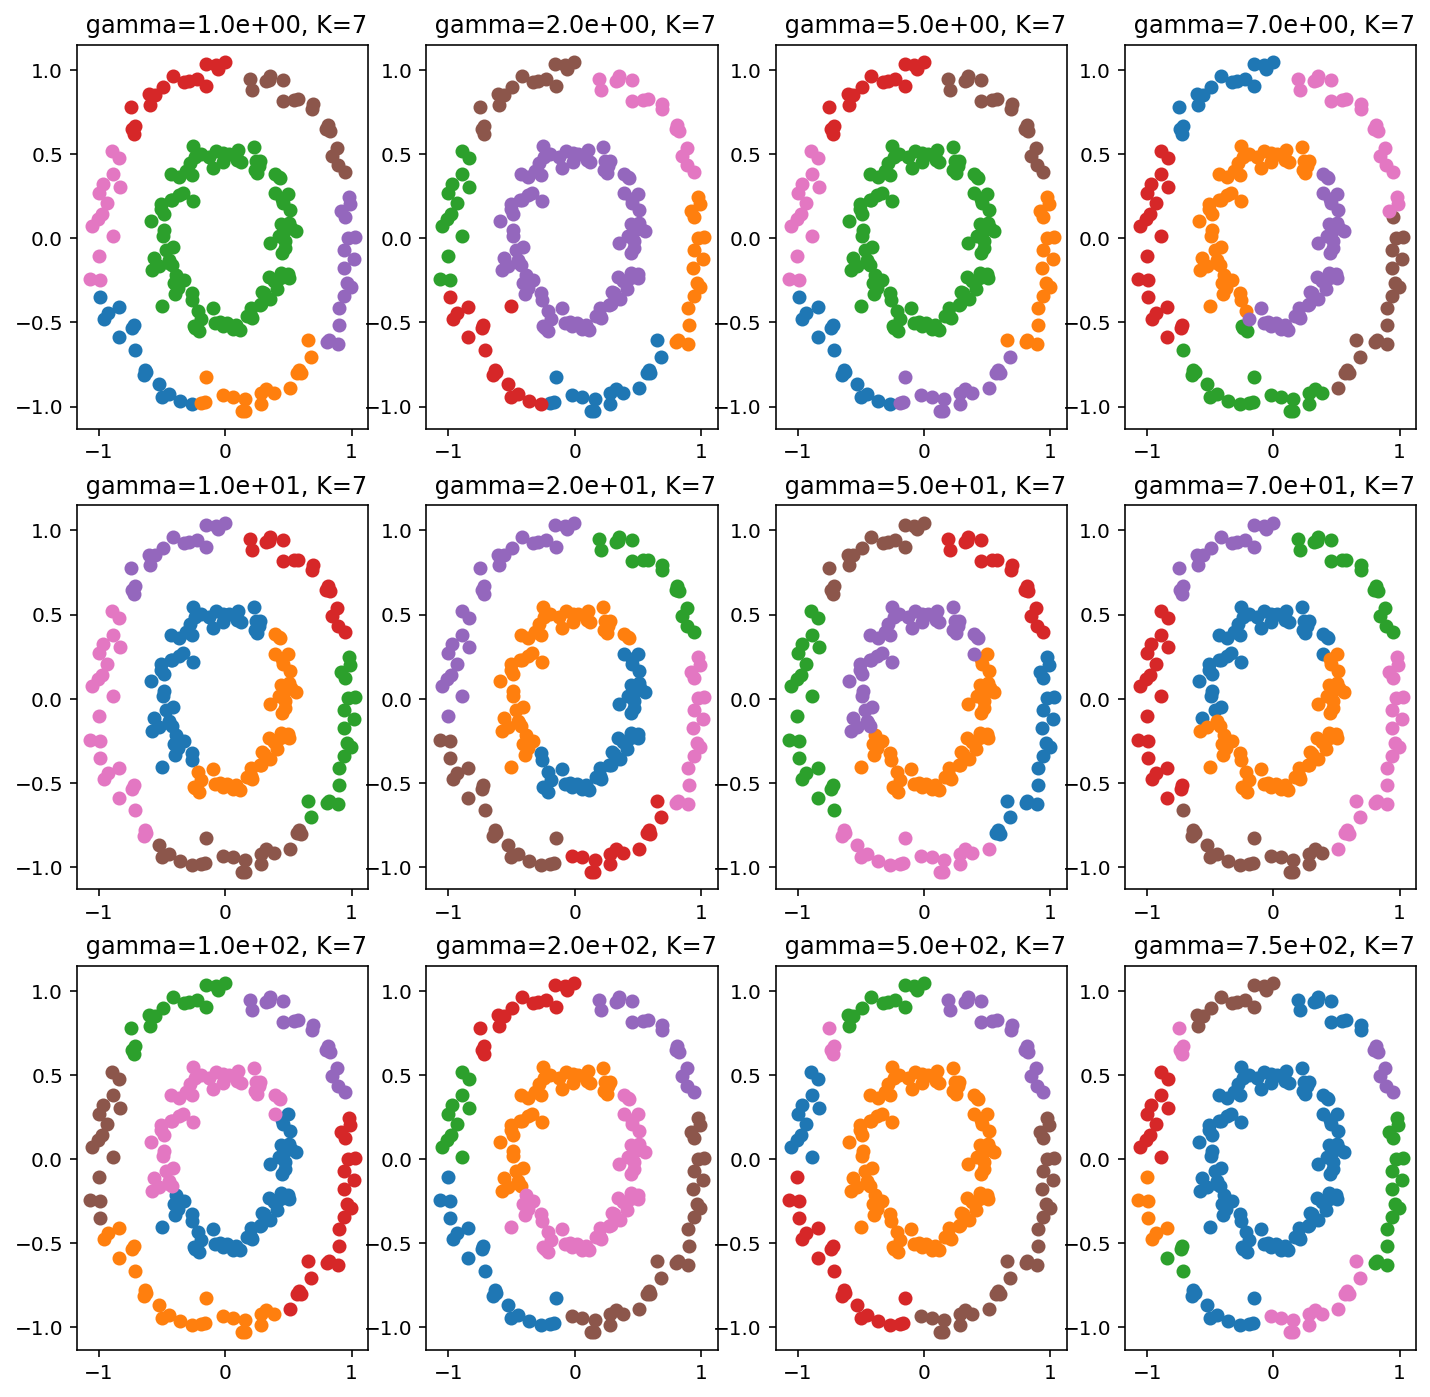

In [ ]:
nrows=3
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
K = 7
v_gamma = [1, 2, 5, 7, 10, 20, 50, 70, 100, 200, 500, 750]
ig=0
dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        
        gamma = v_gamma[ig]
        ig +=1
        clustering = SpectralClustering(n_clusters=K,gamma=gamma).fit(X)
        y_pred = clustering.labels_
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))
      
        aa[rr][cc].set_title(' gamma={0:.1e}, K={1:d}'.format(gamma,K))
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

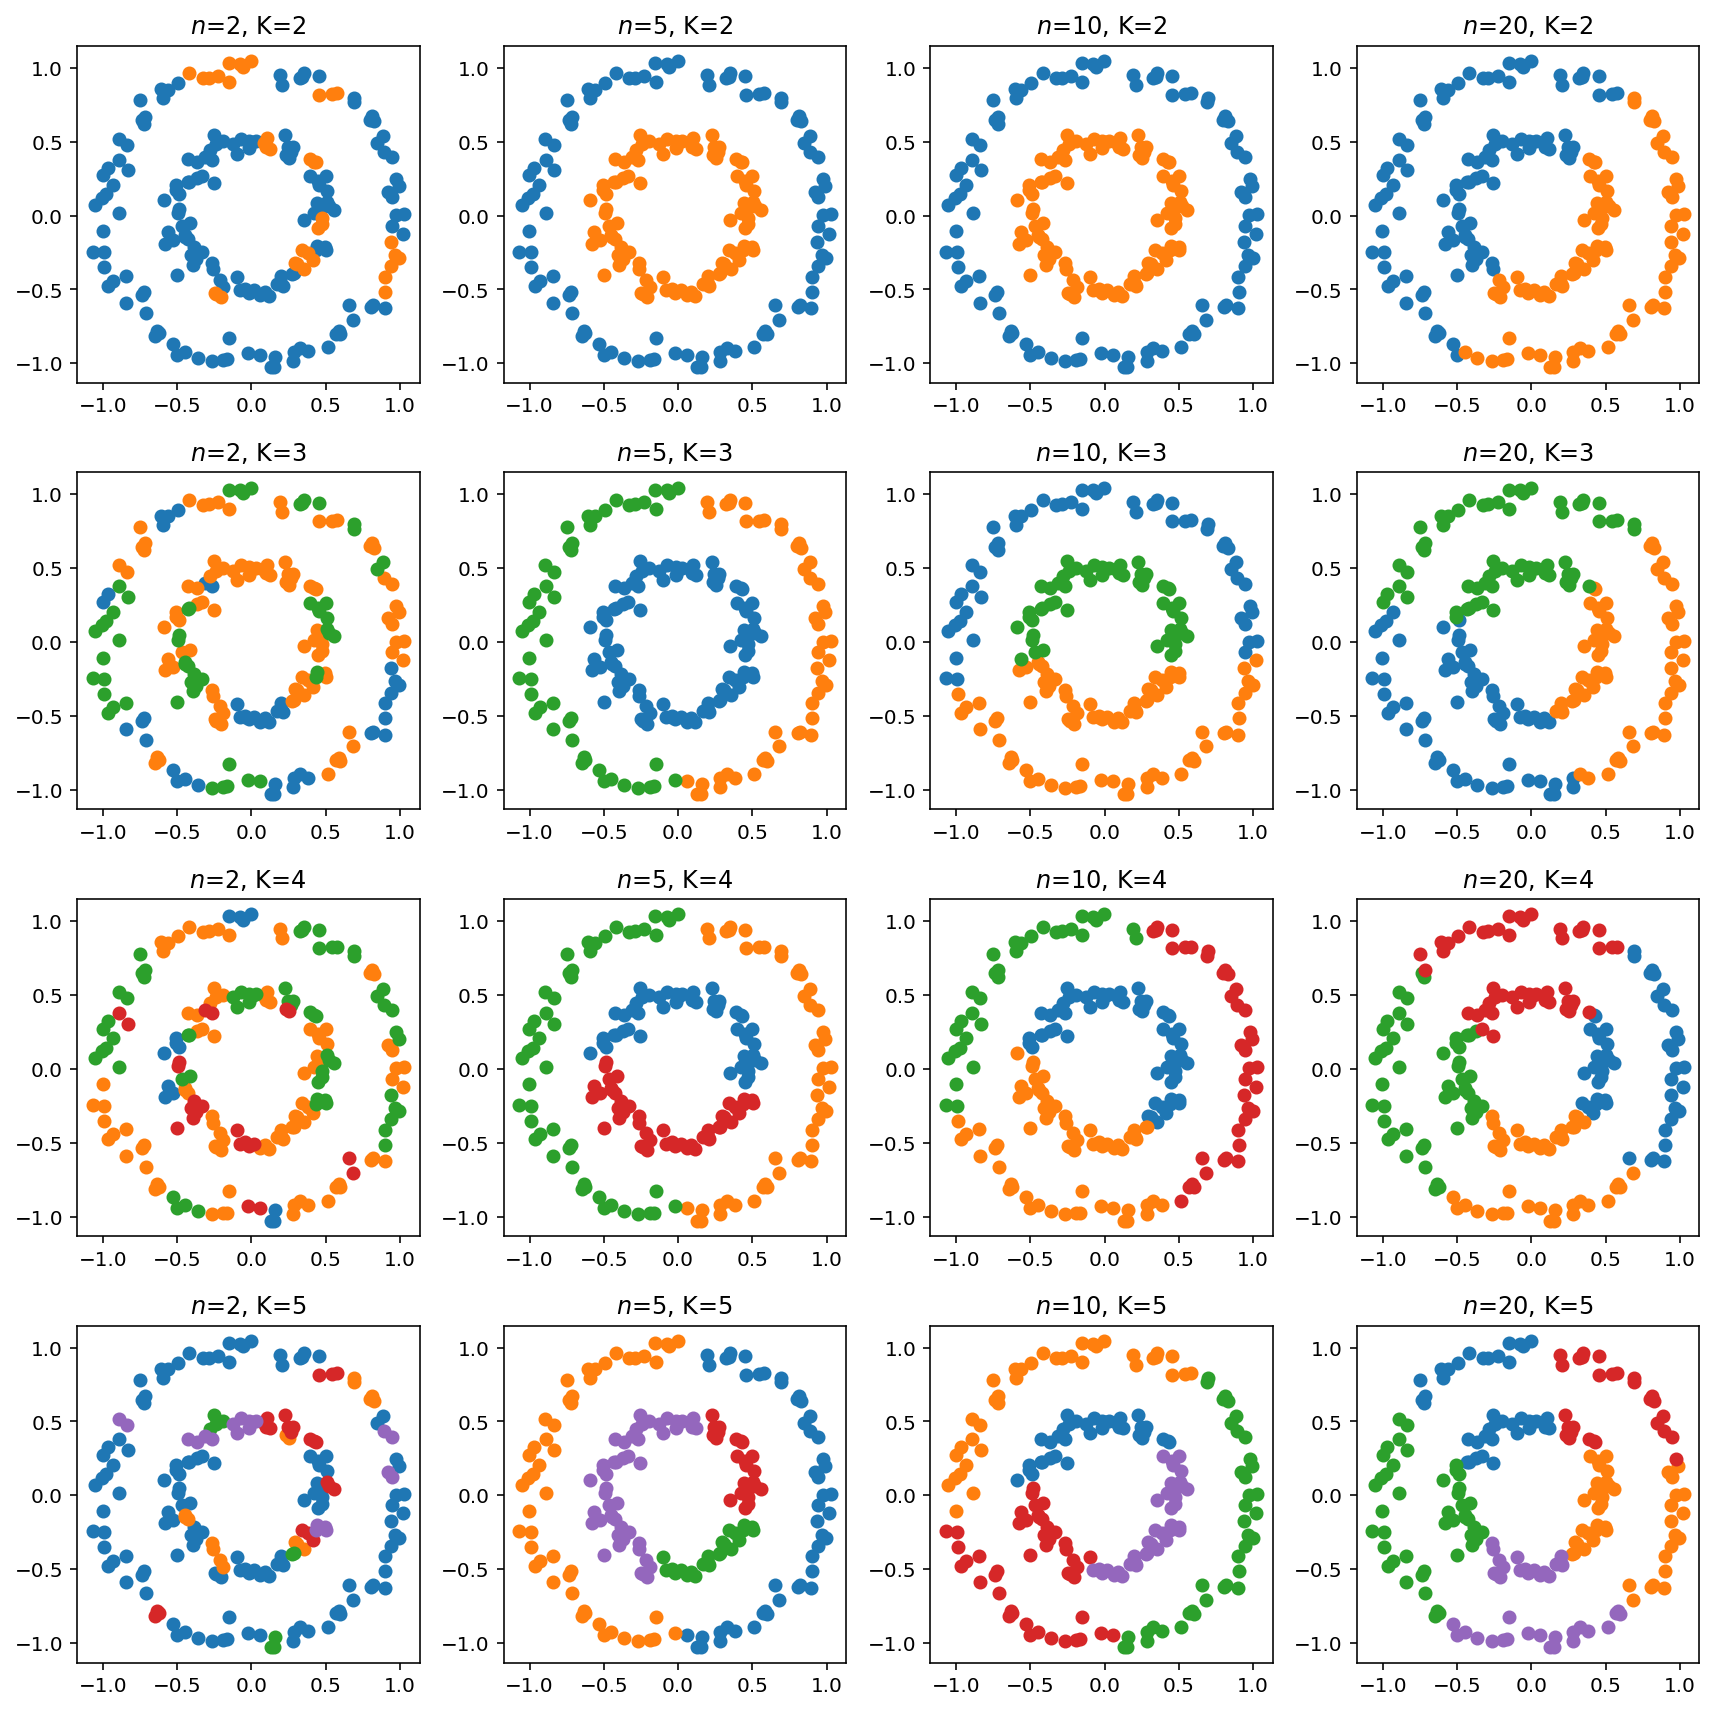

In [ ]:
nrows=4
ncols=4
ff,aa = plt.subplots(nrows, ncols,figsize=(12,12))
v_K = [2, 3, 4, 5]
v_neighbors = [2,5,10,20]

dispersion = np.empty((len(v_K), len(v_gamma)))
mK = np.empty((len(v_K), len(v_gamma)),dtype=int)
for rr in range(nrows):
    for cc in range(ncols):
        K = v_K[rr]
        n_neighbors = v_neighbors[cc]
        clustering = SpectralClustering(n_clusters=K,
                                        affinity='nearest_neighbors',
                                        n_neighbors=n_neighbors).fit(X)
        y_pred = clustering.labels_
        mK[rr,cc] = len(np.unique(y_pred))
    
        for k in range(K):
            idx_k = np.where(y_pred==k)[0]
            aa[rr][cc].scatter(X[idx_k,0], X[idx_k,1], label='k={0:d}'.format(k))
      
        aa[rr][cc].set_title('$n$={0:d}, K={1:d}'.format(n_neighbors,K))
    
ff.tight_layout()  